In [7]:
# Require Pandas version >= 2.2.2
import pandas as pd
assert pd.__version__ >= '2.2.2', 'Please update Pandas to version 2.2.2 or newer'
import pandas as pd, os, pyreadr
import warnings
import time
import numpy as  np
import pandas as pd
import pandas as pd
import visualization as viz
import data_loading as dl
import risk_pricing as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import importlib
importlib.reload(rp)
importlib.reload(viz)
importlib.reload(dl)
warnings.filterwarnings("ignore")
source_folder_path = "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/"
modelname = "embeddings_km10_ipcs" # "dicfullmc10thr10defnob40noa0_8_hdp" # Don't forget to clean again when modelname changes
start_time = time.time()
# print the current working directory (for reference)
print("Current Working Directory:", os.getcwd())
os.chdir(source_folder_path)
print("New Working Directory:", os.getcwd())

Current Working Directory: /Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src
New Working Directory: /Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src


Embeddings loaded from data/embeddings.pkl


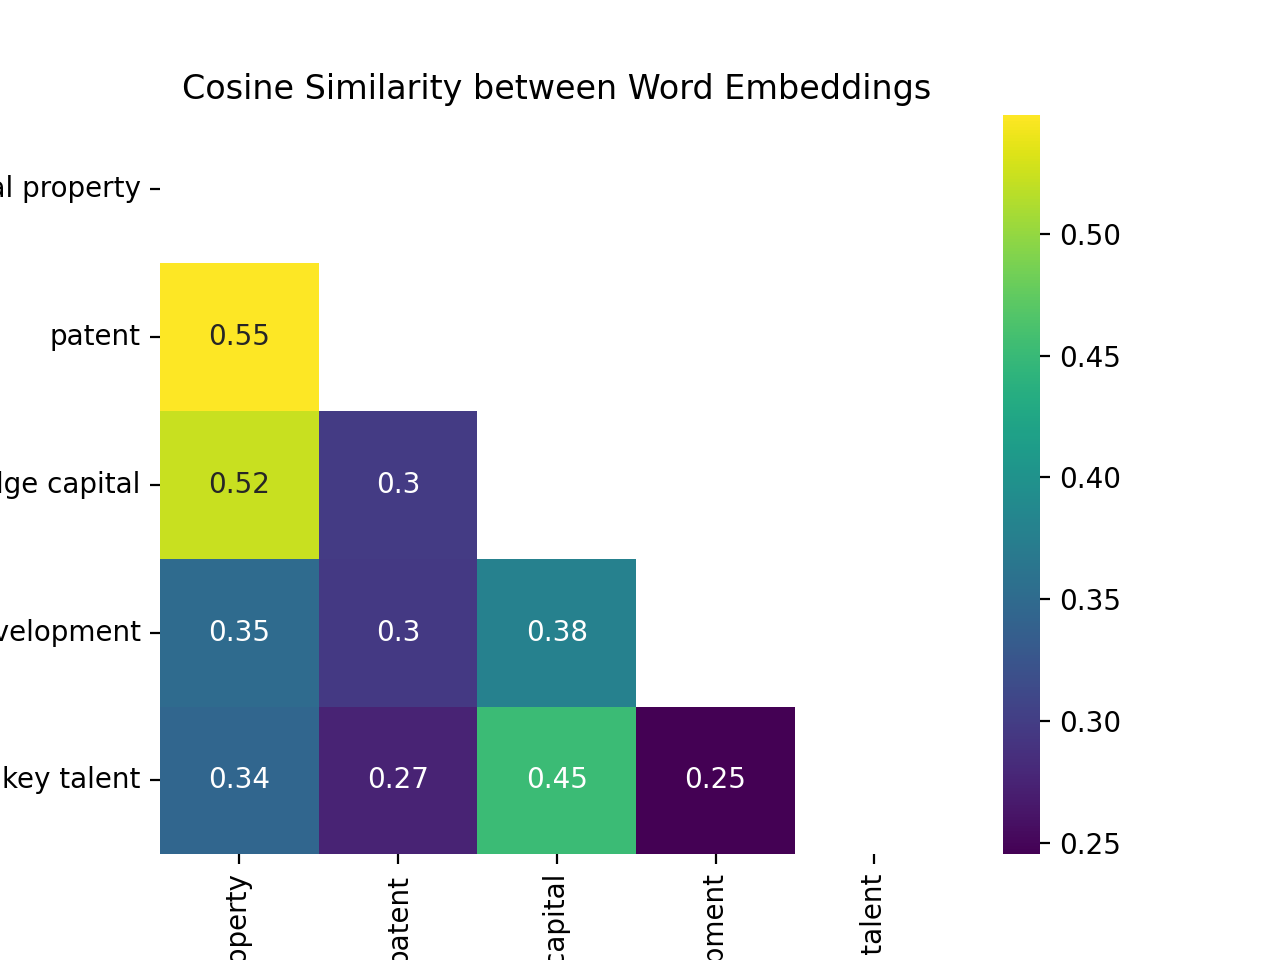

In [19]:
# # Creating additional models
import matplotlib.pyplot as plt
embeddings = Embeddings()
EmbeddingsHKRModel.plot_cosine_similarity(["intellectual property", "patent", "knowledge capital", "research and development", "key talent"])
# Save last plot:
# plt.savefig("cosine_similarity.png")
# base_path = "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/text/"
# dir_path = os.path.join(base_path)
# os.makedirs(dir_path, exist_ok=True)
# figfolder = os.path.join(dir_path, "")
# # Save to the folder:
# plt.savefig(figfolder + "cosine_similarity_terms.png")
# EmbeddingsHKRModel().from_topic_similarity(embeddings, "emb_knocap", "knowledge capital", to_csv = True)
# EmbeddingsHKRModel().from_topic_similarity(embeddings, "emb_patents", "patents", to_csv = True)
# EmbeddingsHKRModel().from_topic_similarity(embeddings, "emb_intcap", "intangible capital", to_csv = True)

In [3]:
# Loading the data from load_dataframes:


In [6]:
import risk_pricing as rp
import importlib
import embedding_tools as et
from embedding_tools import Embeddings
from embedding_tools import EmbeddingsHKRModel
importlib.reload(rp)
importlib.reload(viz)
quantiles = 10
# embeddings = Embeddings()
# EmbeddingsHKRModel().from_topic_similarity(embeddings, "emb_kt", "key talent", to_csv = True)
for quantiles in [10]:
    for modelname in ["embeddings_km10_ipcs"]:
        for pfname in ["pfkki3me3mb"]:
            amazon_nov01_short, cequity_mapper, ff3fw, ff5fw, ff3fm, ff5fm, topic_map_unlabeled, comparison_measures, stoxmo_orig, stoxda_orig, stoxwe_orig = \
                dl.load_dataframes(modelname, start_time, clean_again = False)
            cuts = np.linspace(0, 1, quantiles+1).tolist()
            topic_map = viz.label_topic_map(topic_map_unlabeled, modelname, cuts = cuts)
            fmb_5, indexed_df, eret_we, stoxwe_add = rp.famaMacBethFull(stoxwe_orig, cequity_mapper, topic_map, ff5fw, pfname, kki_cuts = cuts, window_size = 52*2, add_innerkk_pf = True)
            fmb_3, _, _, _ = rp.famaMacBethFull(stoxwe_orig, cequity_mapper, topic_map, ff3fw, pfname, kki_cuts = cuts, window_size = 52*2, add_innerkk_pf = True)
            fmb_1, _, _, _ = rp.famaMacBethFull(stoxwe_orig, cequity_mapper, topic_map, ff3fw, pfname, formula = "eretw ~ MktRF + HKR", kki_cuts = cuts, window_size = 52*2, add_innerkk_pf = True)
            #import visualization as viz
            base_path = "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/text/"
            dir_path = os.path.join(base_path, f"{modelname}_{quantiles}tiles_{pfname}_HKR_SB")
            os.makedirs(dir_path, exist_ok=True)
            figfolder = os.path.join(dir_path, "")
            generate_plots = True
            ##
            viz.explore_topic_map(topic_map, figfolder, generate_plots)
            viz.explore_fmb([fmb_1, fmb_3, fmb_5], figfolder)
            viz.explore_eret_we(eret_we, figfolder)
            viz.tex_compare_kk_measures(comparison_measures, figfolder)
            viz.plot_returns(stoxwe_add, figfolder)
            #viz.amazon_graph(amazon_nov01_short, figfolder)
            #viz.filecounter(figfolder)
            viz.explore_stoxda(stoxda_orig, cequity_mapper, topic_map, figfolder)

Tempo de execução depois de carregar os dados: 6499.84467291832


/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/risk_pricing/risk_pricing.py:398: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/risk_pricing/risk_pricing.py:424: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/risk_

Executing fig_mean_tiy...
Executing tex_average_topic_loadings_by_high_tech...
Executing tex_sample_topic_loadings...
Executing df_skill_correlations...
Executing df_patent_correlations...
Executing fig_share_dominant_kk_by_ind...
Executing fig_heatmap_topicvskkpt...
Executing fig_heatmap_topicvsikpt...
Executing fig_histogram_kk...
Executing fig_histogram_kk_by_ind12...
Finished!
Executing explore_fmb...
Executing tex_summary...
Executing fig_h1b_vs_smb_kkhml...
Executing tex_HKR_vs_mktrf...
Executing tex_summary_statistics...
Now with Sharpe ratio
Executing tex_compare_kk_measures...
Executing plot_returns...


/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/visualization/visualization.py:615: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/visualization/visualization.py:627: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


Executing preprocess_stoxda...
Executing plot_moment...
Executing plot_moment...


/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/visualization/visualization.py:557: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


Executing plot_moment...
Tempo de execução depois de carregar os dados: 6871.184889793396


/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/risk_pricing/risk_pricing.py:398: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/risk_pricing/risk_pricing.py:424: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/risk_

Executing fig_mean_tiy...
Executing tex_average_topic_loadings_by_high_tech...
Executing tex_sample_topic_loadings...
Executing df_skill_correlations...
Executing df_patent_correlations...
Executing fig_share_dominant_kk_by_ind...
Executing fig_heatmap_topicvskkpt...
Executing fig_heatmap_topicvsikpt...
Executing fig_histogram_kk...
Executing fig_histogram_kk_by_ind12...
Finished!
Executing explore_fmb...
Executing tex_summary...
Executing fig_h1b_vs_smb_kkhml...
Executing tex_HKR_vs_mktrf...
Executing tex_summary_statistics...
Now with Sharpe ratio
Executing tex_compare_kk_measures...
Executing plot_returns...


/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/visualization/visualization.py:615: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/visualization/visualization.py:627: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


Executing preprocess_stoxda...
Executing plot_moment...
Executing plot_moment...


/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/visualization/visualization.py:557: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


Executing plot_moment...


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
# stoxda = stoxda_orig
# moment_name = "kurtosis"
# statfunc = pd.Series.kurt
# hue_var = 'ntile_kk'
# frequency = 'Y'

# # Format date and create 'y' and 'ym' columns
# stoxda['date'] = pd.to_datetime(stoxda['date'])
# stoxda['y'] = stoxda['date'].dt.year
# stoxda['ym'] = stoxda['y']*100 + stoxda['date'].dt.month
# topic_map = topic_map.assign(me=lambda x: x['csho'] * x['prcc_f']) #groupby(['PERMNO', hue_var])
# stox = pd.merge(stoxda, cequity_mapper, left_on=['PERMNO', 'y'], right_on=['PERMNO', 'year'], how='left')
# stox = stox[stox['crit_ALL'] == 1]
# stox = pd.merge(stox, topic_map, left_on=['PERMNO', 'y'], right_on=['LPERMNO', 'year'], how='left')
# stox.set_index('date', inplace=True)

# statfunc = pd.Series.kurt
# moment_df = stox.groupby(['PERMNO', hue_var]).resample(frequency)['RET'].apply(statfunc)
# moment_df = moment_df.reset_index()
# stoxme_df = stox.reset_index()[['PERMNO', 'date', 'me']]
# moment_df = moment_df.merge(stoxme_df, on=['PERMNO', 'date'], how='left')
# moment_df = moment_df.dropna(subset=['RET', 'me'])
# stox_by_kk = (moment_df.groupby([hue_var, 'date'])
#                       .apply(lambda x: pd.Series({'avg_kurt': (x['RET'] * x['me']).sum() / x['me'].sum()}))
#                       .reset_index())

# # me_df = topic_map[['LPERMNO', 'year', 'me']]
# # me_df['year'] = pd.to_datetime(me_df['year'].astype(str) + '-12-31')
# # # Rename LPERMNO to PERMNO
# # me_df = me_df.rename(columns={'LPERMNO': 'PERMNO'})
# # me_df = stox.groupby(['PERMNO', hue_var]).resample(frequency)['RET'].apply(statfunc)
# stox_by_kk = (moment_df.reset_index().groupby([hue_var, 'date'])
#                 .agg(avg_kurt=('RET', 'mean'))
#                 .reset_index())
# moment_df= moment_df.reset_index()
# large_palette = sns.color_palette('husl', 8)
# # Find the two lowest and two highest values of ntile_kk:
# ntile_kk_values = stox_by_kk[hue_var].unique()
# sorted_values = sorted(ntile_kk_values)

# lowest_two = sorted_values[:2]
# highest_two = sorted_values[-2:]
# keep = lowest_two + highest_two

# # Filter stox_by_kk to only include ntile_kk values equal to the two lowest and two highest values of ntile_kk
# if hue_var == 'ntile_kk':
#     stox_by_kk = stox_by_kk[stox_by_kk[hue_var].isin(keep)]
# if hue_var == 'max_topic':
#     # Filter only rows where max_topic is between 0 and 7 (inclusive):
#     stox_by_kk = stox_by_kk[stox_by_kk[hue_var].between(0, 7)]
# sns.lineplot(data=stox_by_kk, x='date', y='avg_kurt', hue=hue_var, palette=large_palette)
# plt.title(f"{moment_name} over time by {hue_var}")
# plt.xlabel("Year-Month")
# plt.ylabel(f"{moment_name}")
# plt.legend(title='Group', fontsize='small')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig(f"{figfolder}/{moment_name}_by_{hue_var}_{frequency}.jpg", dpi=600)
# plt.clf()